In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


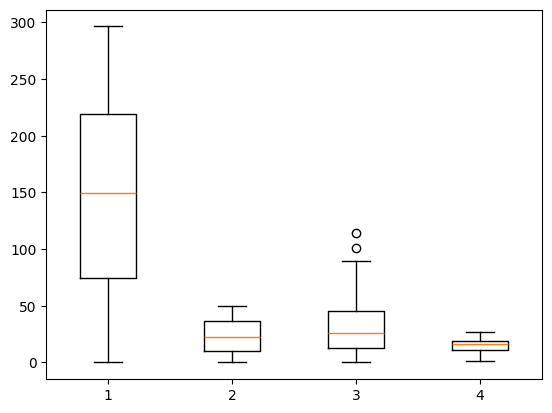

In [4]:
plt.boxplot(df)
plt.show()

In [5]:
# normalization

cols = df.columns

for col in cols:
    df[col] = (df[col] - df[col].min())/(df[col].max() - df[col].min())
df

,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.605981,0.807087
1,0.148123,0.792339,0.394019,0.346457
2,0.055800,0.925403,0.606860,0.409449
3,0.509976,0.832661,0.511873,0.586614
4,0.609063,0.217742,0.510994,0.641732
...,...,...,...,...
195,0.126818,0.074597,0.118734,0.236220
196,0.316199,0.098790,0.068602,0.488189
197,0.596212,0.187500,0.053650,0.519685
198,0.956713,0.846774,0.579595,0.940945


In [6]:
# removing the outliers if any

for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    upper_bound = q3+iqr*1.5
    lower_bound = q1-iqr*1.5
    df[col] = df[col].apply(lambda x : upper_bound if x>upper_bound else lower_bound if x<lower_bound else x)
print('data without outliers : ')
df

data without outliers : 


,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.605981,0.807087
1,0.148123,0.792339,0.394019,0.346457
2,0.055800,0.925403,0.606860,0.409449
3,0.509976,0.832661,0.511873,0.586614
4,0.609063,0.217742,0.510994,0.641732
...,...,...,...,...
195,0.126818,0.074597,0.118734,0.236220
196,0.316199,0.098790,0.068602,0.488189
197,0.596212,0.187500,0.053650,0.519685
198,0.956713,0.846774,0.579595,0.940945


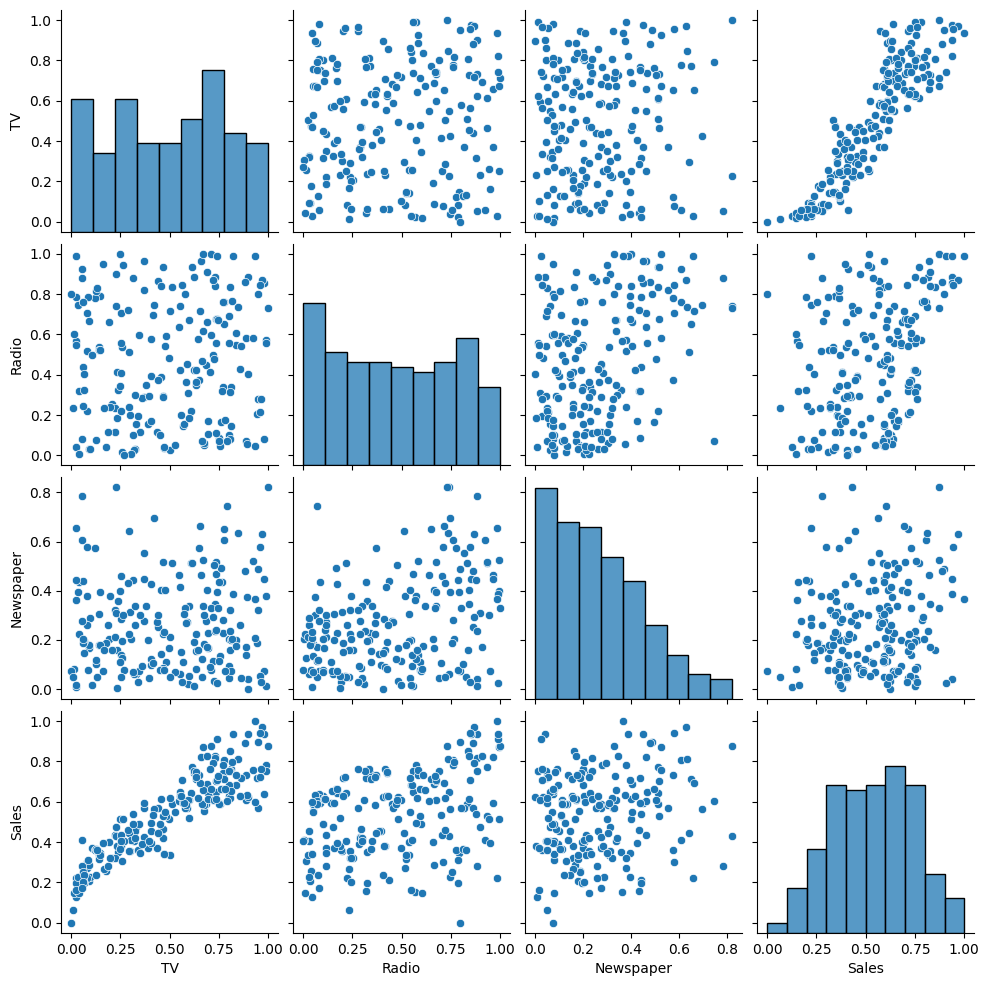

In [7]:

import seaborn as sns

sns.pairplot(df)
plt.show()

In [8]:
df['TV']

0      0.775786
1      0.148123
2      0.055800
3      0.509976
4      0.609063
         ...   
195    0.126818
196    0.316199
197    0.596212
198    0.956713
199    0.782550
Name: TV, Length: 200, dtype: float64

In [9]:
x = df.iloc[:,:-3]
y = df.iloc[:,3]

In [10]:
y

0      0.807087
1      0.346457
2      0.409449
3      0.586614
4      0.641732
         ...   
195    0.236220
196    0.488189
197    0.519685
198    0.940945
199    0.661417
Name: Sales, Length: 200, dtype: float64

r2 score for this model is =  0.7895483556967715
Mean squared error is =  0.008885630077575129


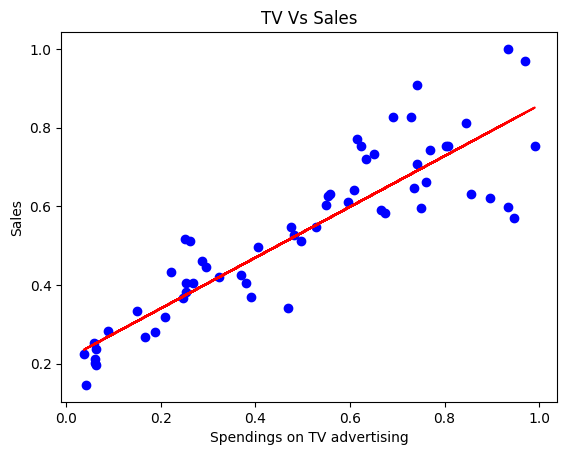

In [12]:
class linear_regression_():
    def __init__(self, epochs = 1000, learning_rate = 0.1):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, x,y):
        n_samples, n_features = x.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.epochs):
            prediction = self.predict(x)

            dw = np.dot(x.T, (prediction-y)) / n_samples
            db = np.sum(prediction-y)/n_samples

            self.weights -= self.lr*dw
            self.bias -= self.lr*db

    def predict(self,x):
        prediction = np.dot(x, self.weights) + self.bias
        return prediction

def main():
    from sklearn.model_selection import train_test_split
    x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 123)
    
    model = linear_regression_()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    def r2_score_(y_pred, y_test):
        e_1 = y_pred - y_test
        ss_e_1 = np.sum(e_1**2)
        e_2 = y_test - y_test.mean()
        ss_e_2 = np.sum(e_2**2)
        r2 = 1 - (ss_e_1)/(ss_e_2)
        return r2
    print('r2 score for this model is = ', r2_score_(y_pred, y_test))

    def mean_squared_error(y_pred,y_test):
        e_1 = y_pred - y_test
        ss_e_1 = np.sum(e_1**2)
        return (ss_e_1)/len(y_test)
    print('Mean squared error is = ', mean_squared_error(y_pred, y_test))

    plt.scatter(x_test,y_test,color = 'blue')
    plt.plot(x_test, y_pred, color = 'red')
    plt.title('TV Vs Sales')
    plt.xlabel('Spendings on TV advertising')
    plt.ylabel('Sales')
    plt.show()


if __name__ == '__main__':
    main()

